# Credit Card Fraud Detection

###First, loading the dataset from kaggle hub and visualize it


In [ ]:
import kagglehub,os
path=kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:",path)
files=os.listdir(path)
print(files)
csv_file=os.path.join(path,'creditcard.csv')
print(csv_file)

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
['creditcard.csv']
/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv


In [ ]:
import pandas as pd
df = pd.read_csv(csv_file)

df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
print("Dataset shape:", df.shape)


Dataset shape: (284807, 31)


Then, We will check if the data is clean

In [ ]:
#missing values
print("Missing values:")
print(df.isnull().sum())
#data types
print("\n Data types:")
print(df.dtypes)
print("\n Dataset Description:")
print(df.describe())
#negative time or amount
print("\n negative values in 'Amount' or 'Time':")
print((df[['Amount','Time']]< 0).sum())


Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

 Dataset Des

The class distribution:


Class distribution
Class
0    284315
1       492
Name: count, dtype: int64


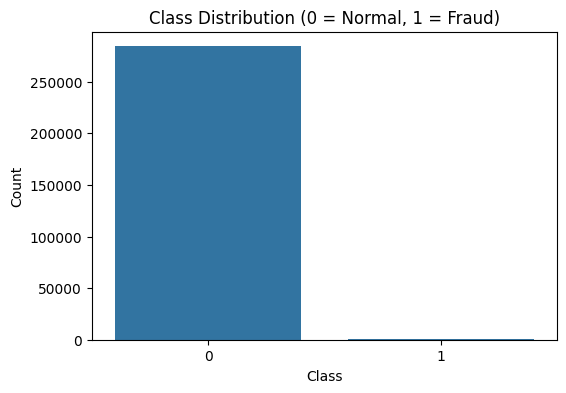

In [ ]:
print("\nClass distribution")
print(df['Class'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The diagram shows that the data is imbalanced and we should handle this by different methods


To handle the imbalanced data we tried first undersampling the majority class and apply svm with different kernels and C to get the best model

Best C value: 1
Best kernel: rbf
AUC-ROC Score:0.9853029211121702


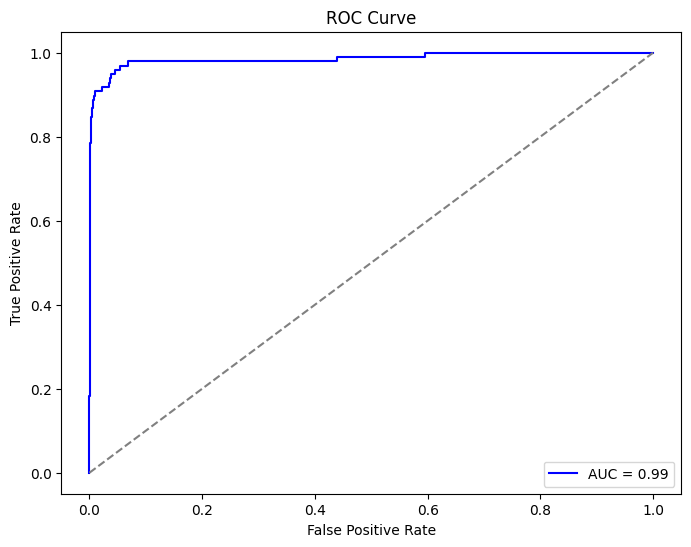

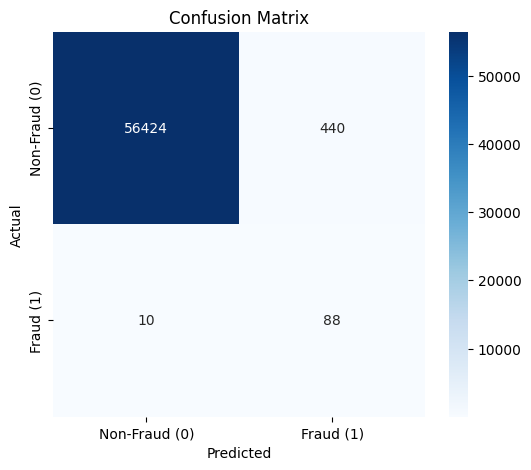

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
#Dropinf the class values from the input
X = df.drop('Class', axis=1)
#Removing the time feature
X = X.drop('Time', axis=1)
y = df['Class']  #Target

#train-test split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#Undersample the majority class to 5000 samples
under_sampler =RandomUnderSampler(sampling_strategy={0: 5000}, random_state=42)
X_train_resampled_0,y_train_resampled_0=under_sampler.fit_resample(X_train, y_train)

#Applying a scaler to the features to improve the performance of the model
scaler = StandardScaler()
X_train_resampled_0 = scaler.fit_transform(X_train_resampled_0)
X_test = scaler.transform(X_test)

#The parameters that we will try to tune to get the best model
param_grid ={
    'C':[1, 7, 10],
    'kernel':['linear','rbf']
}

#grid search with cross validation,the class weight=balanced is used
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled_0, y_train_resampled_0)

#Getting the best model
best_kernel_model=grid_search.best_estimator_
best_params =grid_search.best_params_
print(f"Best C value: {best_params['C']}")
print(f"Best kernel: {best_params['kernel']}")

#Make the prediction with the best model
y_pred=best_kernel_model.predict(X_test)
y_pred_proba=best_kernel_model.decision_function(X_test)




#Calculate the auc_roc
auc_roc_kernel=roc_auc_score(y_test,y_pred_proba)
print(f"AUC-ROC Score:{auc_roc_kernel}")

#Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc_kernel:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-Fraud (0)','Fraud (1)'],yticklabels=['Non-Fraud (0)','Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Let's see the calssification report of the svm with kernel

In [ ]:
from sklearn.metrics import classification_report


report =classification_report(y_test,y_pred)
print(report)
report_dict=classification_report(y_test, y_pred, output_dict=True)
recall_fraud_kernel = report_dict['1']['recall'] #Saved for comparision





              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.90      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.64     56962
weighted avg       1.00      0.99      0.99     56962



### Why Precision Might Not Be Meaningful in Imbalanced Data

In the context of imbalanced datasets,the precision metric may not provide an accurate reflection of model performance.Precision is defined as:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

where:
- \( TP \) = True Positives
- \( FP \) = False Positives

When the dataset is imbalanced (e.g., a small number of positive class samples like our datasert), because the model is testing a higher number of negative dat. As a result, the number of true positive will be low compared to false positive ones, which  affect the precision value for the minority class (positive class).

This can be misleading because even though precision might seem low , the model could be performing well in detecting the minority class. Therefore, other metrics such as **Recall** or **AUC-ROC** are often preferred for imbalanced datasets since they give the real model performance



Another Approach:Oversampling the minority class using the SMOTE algorithm,based on k-nn method to synthesize new samples,and then train the model

Best C value: 10


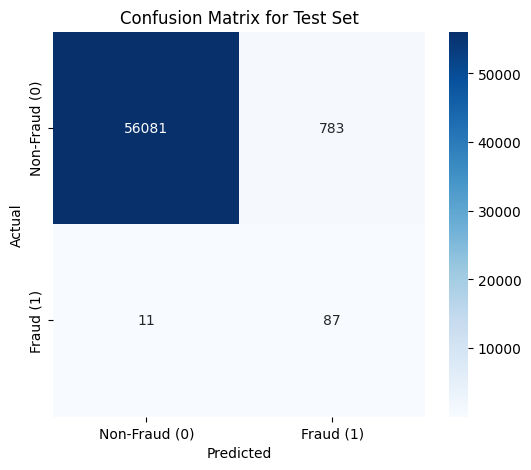

AUC-ROC Score: 0.9729537284807002


In [ ]:
#We will apply linear scv model because the computation with svm with kernel is so high
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
X = df.drop('Class', axis=1)
X = X.drop('Time', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Apply smote on the train data only by adding examples to the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#Make a search grid on C
param_grid = {'C': [1, 7, 10]}
grid_search =GridSearchCV(LinearSVC(class_weight='balanced', random_state=42, max_iter=1000), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

#Getting the best model
best_svc_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best C value: {best_params['C']}")

#Make the predictions
y_pred = best_svc_model.predict(X_test)
y_pred_proba = best_svc_model.decision_function(X_test)

#Compute the confusion matrix
cm_test=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#get the auc_roc
auc_roc_svc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc_svc}")





Lets see the classification report of the linear svc

In [ ]:

print("Classification Report:")
print(classification_report(y_test, y_pred))
report_dict=classification_report(y_test, y_pred, output_dict=True)
recall_fraud_svc = report_dict['1']['recall'] #Saved for comparision

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.89      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



### Model Comparison: Linear SVC with SMOTE vs. SVC with Kernel and Undersampling

In our comparison of the two models, we observed the following:

- **Linear SVC with SMOTE**: This model showed better results in detecting **Non-Fraud (0)** transactions. The recall value for Non-Fraud was higher, indicating that the model performed better at identifying the majority class.

- **SVC with Kernel and Undersampling**: On the other hand, this model gave slowly better results for detecting **Fraud (1)** transactions. The recall value for Fraud was higher, suggesting that the model was more effective in identifying the minority class.



SHAP Explainer for the linear svc:

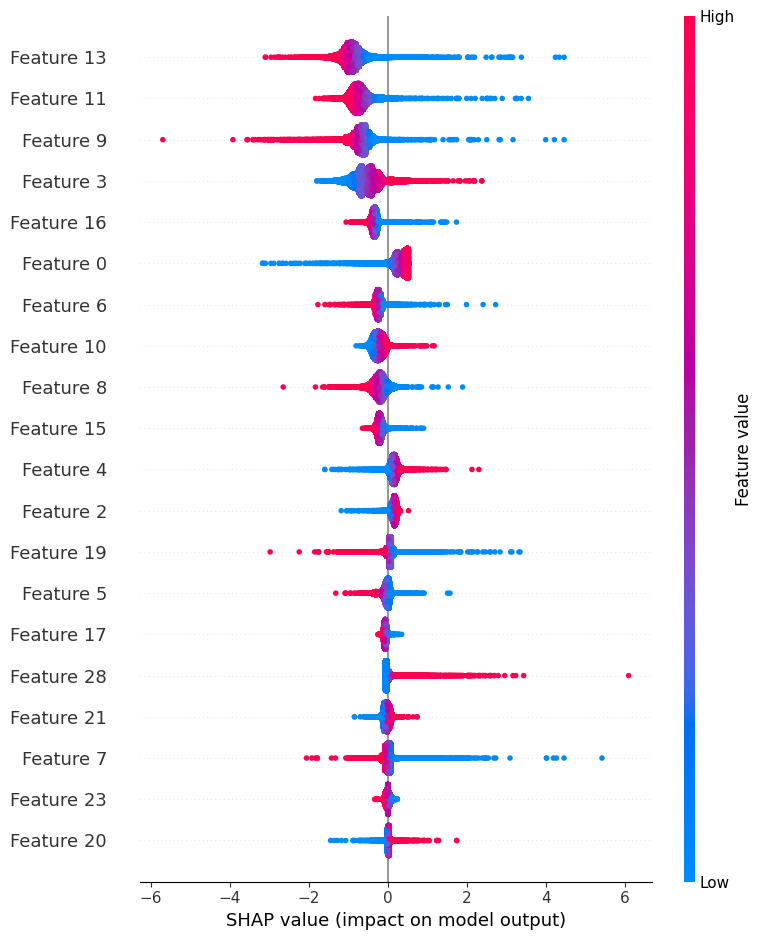

In [ ]:
import shap
import numpy as np

explainer = shap.LinearExplainer(best_svc_model, X_train_resampled)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


Getting the explainer for one sample

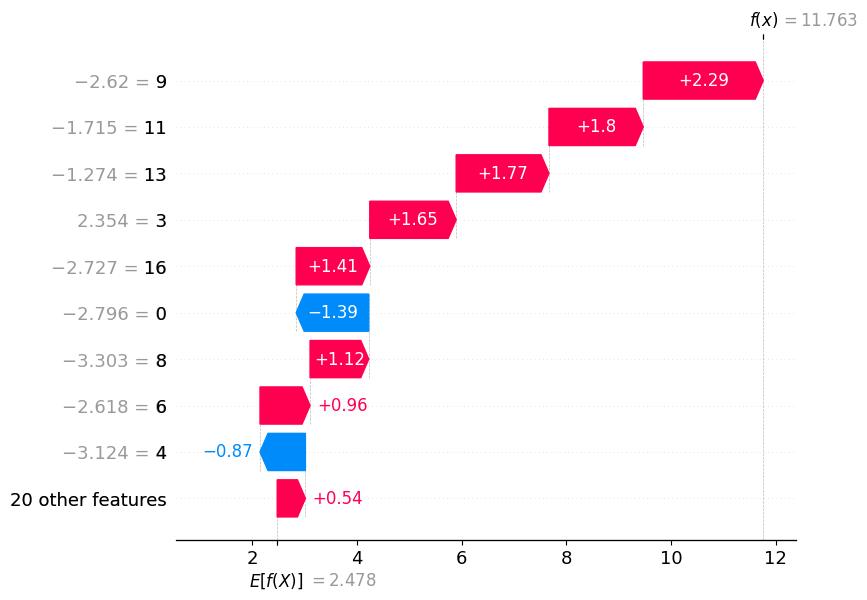

In [ ]:


shap.initjs()
X_sample_df = pd.DataFrame(X_test)
sample_index = 0
shap_values = explainer.shap_values(X_sample_df)
shap_value_for_sample = shap_values[sample_index]

explanation = shap.Explanation(values=shap_value_for_sample,
                                base_values=explainer.expected_value,
                                data=X_sample_df.iloc[sample_index].values,
                                feature_names=X_sample_df.columns.astype(str))

shap.waterfall_plot(explanation)

### SHAP Explainer for the Linear Model

In order to better understand the behavior of our linear svc model, we used **SHAP (SHapley Additive exPlanations)** values. SHAP values provide a way to explain the contribution of each feature to the model's predictions, offering insights into how individual features influence the output.

The waterfall of this special example showed the the features 11 and 9 played the initial role in predicting this sample


#Ensemble learning

First:Bagging as RandomForest,
Random Forest applies the Bootstrap Aggregating (Bagging) method, where multiple decision trees are trained on different random subsets of the data, and their predictions are aggregated to improve accuracy and reduce overfitting.

AUC Score: 0.9837108661697657


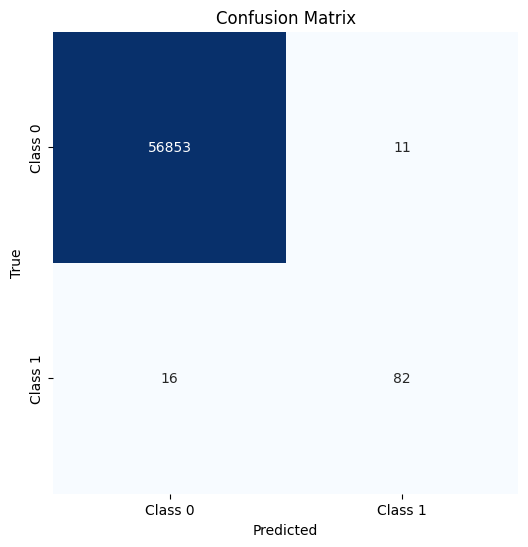

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Train the randomforest on the smote resampled train
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_resampled, y_train_resampled)
y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)
auc_score_randomforest= roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score_randomforest}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:

print("Classification Report for Randomforest:")
print(classification_report(y_test, y_pred))
report_dict=classification_report(y_test, y_pred, output_dict=True)
recall_fraud_randomforest = report_dict['1']['recall'] #Saved for comparision

Classification Report for Randomforest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Second:Boosting method as XGBOOST,XGBoost uses boosting, where trees are built sequentially, with each tree trying to correct the errors made by the previous one. This process leads to a strong predictive model by emphasizing difficult-to-predict samples.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:02:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC Score for XGBoost: 0.9903609973815075


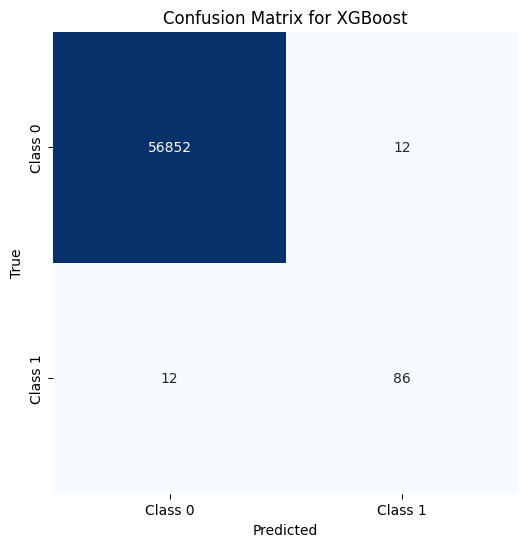

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f"AUC Score for XGBoost: {auc_score_xgb}")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
print("Classification Report for XGBOOST: ")
print(classification_report(y_test, y_pred))
report_dict=classification_report(y_test, y_pred, output_dict=True)
recall_fraud_xgb = report_dict['1']['recall']

Classification Report for XGBOOST: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



##Explainability for XGBOOST

100%|===================| 56823/56962 [06:00<00:00]       

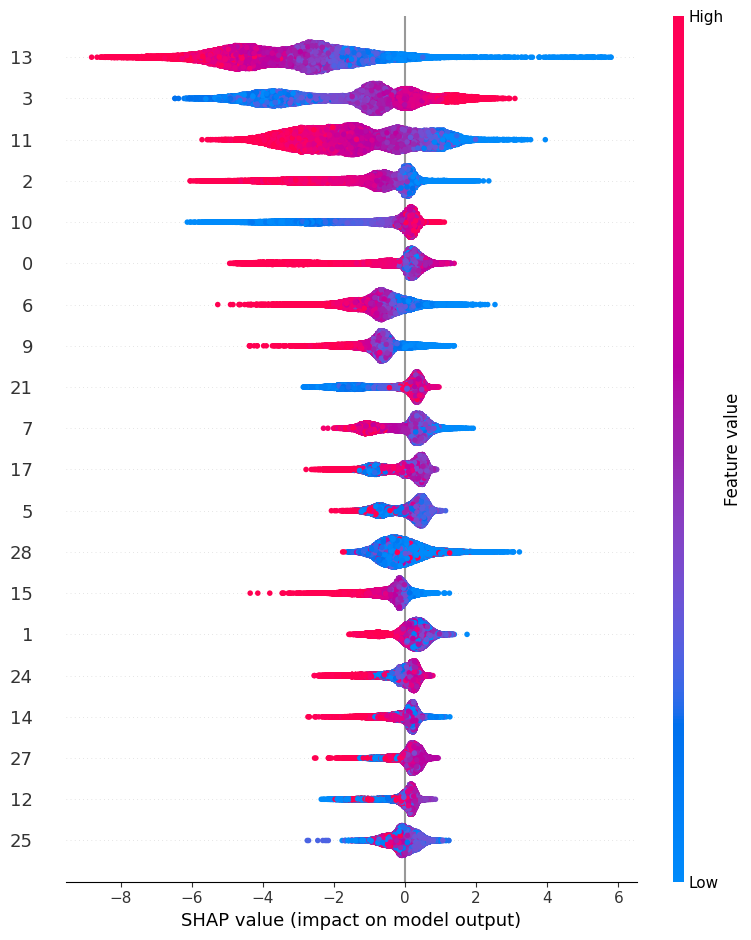

In [ ]:
explainer = shap.Explainer(xgb_model, X_train_resampled)
shap_values = explainer(X_sample_df)

shap.summary_plot(shap_values, X_sample_df)
shap.initjs()
shap.force_plot(shap_values[0])

In this sample-first sample the features 13 and 11 played the most important role in precising that this sample is fraud

In [ ]:
shap.initjs()
shap.force_plot(shap_values[1])

In this second sample 3-13-11 played also the higher role in determining that this sample isnt fraud

##Models comparision

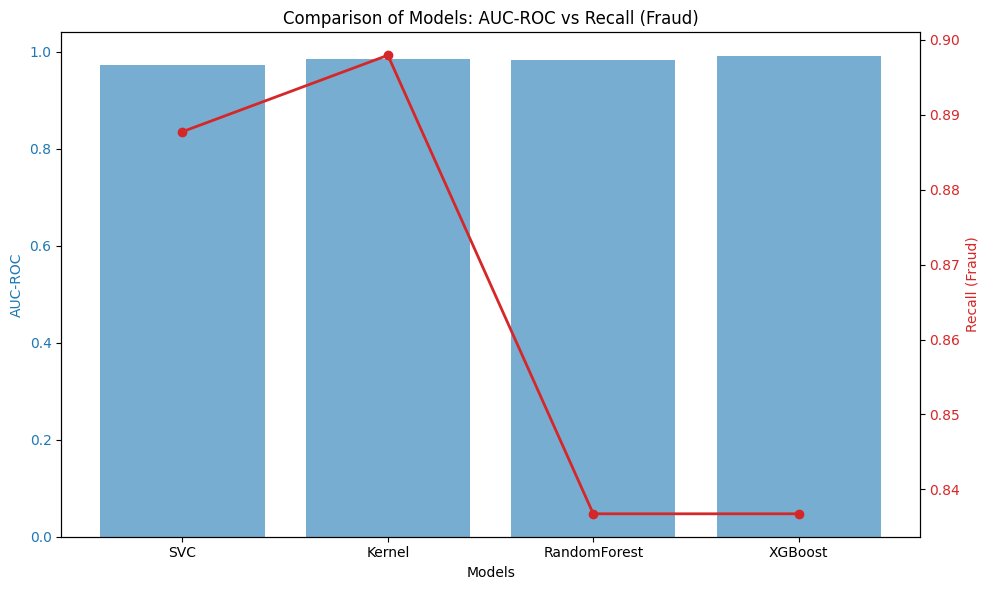

In [ ]:
import matplotlib.pyplot as plt

models = ['SVC', 'Kernel', 'RandomForest', 'XGBoost']
auc_roc = [auc_roc_svc, auc_roc_kernel, auc_score_randomforest, auc_score_xgb]
recall_fraud = [recall_fraud_svc, recall_fraud_kernel, recall_fraud_randomforest, recall_fraud_xgb]
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('AUC-ROC', color=color)
ax1.bar(models, auc_roc, color=color, alpha=0.6, label='AUC-ROC')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Recall (Fraud)', color=color)
ax2.plot(models, recall_fraud, color=color, marker='o', label='Recall (Fraud)', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Models: AUC-ROC vs Recall (Fraud)')
fig.tight_layout()

plt.show()
